<table style="width:100%" border="0">
    <col width="20%">
    <col width="60%">
    <col width="20%">
    <tr></tr>
    <tr>
        <th style="text-align:left"><img src="Images/UNAM_logo.jpg" width="150px"></th>
        <th style="text-align:center"><span style="font-size:220%">Física Computacional</span><br/><br/><span style="font-size:150%">Tarea 8</span></th> 
        <th style="text-align:right"><img src="Images/LogoCiencias.jpg" width="170px"></th>
    </tr>
</table>

In [1]:
using PyPlot
using SymPy

### Ejercicio 1

Se realiza una rutina para calcular la derivada numérica de una función partiendo de su definición pero sin el límite:

$$f'(x_{0})\approx \frac{f(x_{0}+h)-f(x_{0})}{h}:=\frac{\Delta\:f(x_{0},h)}{h},$$

donde $\Delta\:f(x_{0},h)$ se conoce como _diferencia finita hacia adelante_, así que esta aproximación es la _derivada numérica hacia adelante_.

In [2]:
function derivadaNumerica(f,x0,h)
    
    df = (f(x0+h)-f(x0))/h
    
    return df
    
end;

In [3]:
f(x)=cos(x);

In [4]:
derivadaNumerica(f,0.5,0.02)

-0.4881691106361441

### Ejercicio 2

Se extiende la definición de la rutina anterior para calcular la derivada numérica para varias $h$.

In [5]:
function derivada_Numerica(f,x0,h)
    
    x = Sym("x")
    g = f(x)
    dg = diff(g(x))             # Se usa esto para calcular el error relativo.
    df = lambdify(dg,[x])       # Se regresa la derivada a una función de Julia.
    
    D = (f(x0+h)-f(x0))./h      # Lista con las aproximaciones a la derivada.
    E = (D - df(x0) )/df(x0)    # Lista con los errores relativos.
    
    return D,abs.(E)
    
end;

In [6]:
f(x)=cos.(x);

In [7]:
h=linspace(0,1,1000);

In [9]:
A = derivada_Numerica(f,0.1,h);

Para comparar como es que varia el error relativo $\varepsilon$:

$$\varepsilon=\left|\frac{\Delta\:f(x_{0},h)-f'(x_{0})}{f'(x_{0})}\right|,$$

con $h$, se realiza una gráfica $\varepsilon$ - $h$.

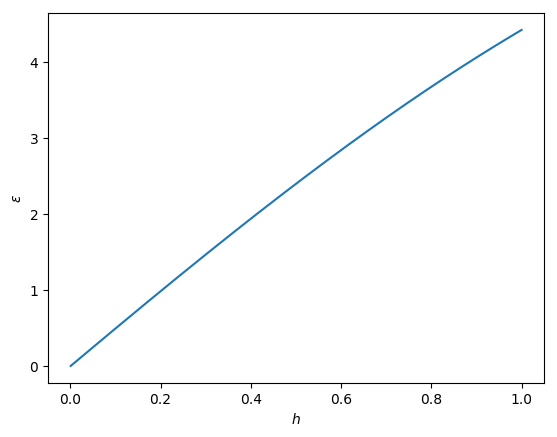

In [10]:
xlabel(L"$h$")
ylabel(L"$\epsilon$")
plot(h,A[2]);

Se observa que el error que introduce esta aproximación escala con $h$.

### Ejercicio 7

Definamos ahora el operador _diferencia finita simétrica_ $\delta_{h}:\:f(x)\mapsto\:f(x+h)-f(x-h)$. Notemos lo siguiente:

$$(\Delta_{h}-\Delta_{-h})\:f(x)=\Delta_{h}\:f(x)-\Delta_{-h}\:f(x)=f(x+h)-f(x)-f(x-h)+f(x),$$

$$(\Delta_{h}-\Delta_{-h})\:f(x)=f(x+h)-f(x-h).$$

Por lo tanto $\delta_{h}=\Delta_{h}-\Delta_{-h}$, ergo:

$$\delta_{h}=\exp\left(h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)-1-\exp\left(-h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)+1,$$

$$\delta_{h}=\exp\left(h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)-\exp\left(-h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right),$$

$$\delta_{h}=2\:\mathrm{senh}\left(h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)$$

Por lo que, al despejar el operador derivada exacta:

$$\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}=\frac{1}{h}\:\mathrm{senh}^{-1}\left(\frac{\delta_{h}}{2}\right)$$

Encontrar la serie de $\mathrm{senh}^{-1}(x)$ no es difícil, basta encontrar la serie de su derivada e integrarla término a término, lo cual es posible hacer en el radio de convergencia.

$$\frac{d}{dx}\mathrm{senh}^{-1}(x)=\frac{1}{\mathrm{senh}'(\mathrm{senh}^{-1}(x))}=\frac{1}{\cosh(\mathrm{senh}^{-1}(x))}=\frac{1}{\sqrt{1+\mathrm{senh}^{2}(\mathrm{senh}^{-1}(x))}}$$

$$\frac{d}{dx}\mathrm{senh}^{-1}(x)=\frac{1}{\sqrt{1+x^{2}}}$$

Por el teorema generalizado del binomio tenemos que:

$$\frac{1}{\sqrt{1+x^{2}}}=\left(1+x^{2}\right)^{-1/2}=\sum_{n=0}^{\infty}\binom{-1/2}{n}x^{2n}.$$

En donde:

$$\binom{-1/2}{n}=\frac{1}{n!}\prod_{k=0}^{n-1}\left(-\frac{1}{2}-k\right)=\frac{(-1)^{n}(2n-1)!!}{2^{n}n!}=\frac{(-1)^{n}(2n)!}{4^{n}(n!)^{2}},$$

por lo que:

$$\frac{1}{\sqrt{1+x^{2}}}=\sum_{n=0}^{\infty}\frac{(-1)^{n}(2n)!}{4^{n}(n!)^{2}}x^{2n}$$

Luego así:

$$\mathrm{senh}^{-1}(x)=\int_{0}^{x}\frac{1}{\sqrt{1+t^{2}}}\:dt=\int_{0}^{x}\sum_{n=0}^{\infty}\frac{(-1)^{n}(2n)!}{4^{n}(n!)^{2}}t^{2n}\:dt=\sum_{n=0}^{\infty}\frac{(-1)^{n}(2n)!}{4^{n}(n!)^{2}}\int_{0}^{x}t^{2n}\:dt.$$

Y como $\displaystyle\int_{0}^{x}t^{2n}\:dt=\frac{x^{2n+1}}{2n+1}$, se tiene que:

$$\mathrm{senh}^{-1}(x)=\sum_{n=0}^{\infty}\frac{(-1)^{n}(2n)!}{4^{n}(n!)^{2}(2n+1)}x^{2n+1}.$$

$$\therefore\:\:\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}=\frac{1}{2h}\sum_{n=0}^{\infty}\frac{(-1)^{n}(2n)!}{4^{2n}(n!)^{2}(2n+1)}\delta_{h}^{\:2n+1}=\frac{1}{2h}\left(\delta_{h}-\frac{1}{24}\delta_{h}^{\:2}+\cdots\right).$$

Observamos que truncando para $n=0$ se tiene el resultado del ejercicio 3.

<div align="right" style="text-indent:0.5cm">**Alonso Torres Edgar Giovanni**</div>